In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import plot_decision_regions

Generate Data

In [3]:
X_train = np.linspace(-1, 1, 20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

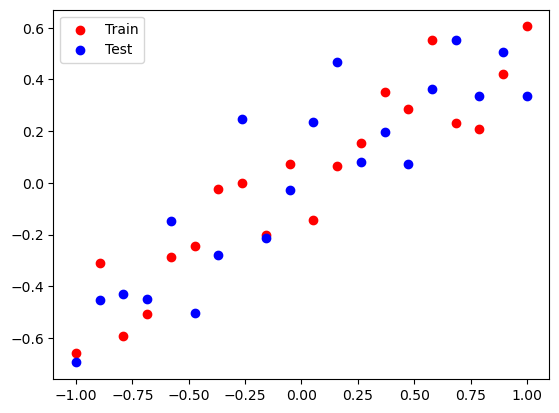

In [7]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [8]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

In [9]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0041452557779848576, Test: 0.04653770104050636


In [10]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 174ms/step


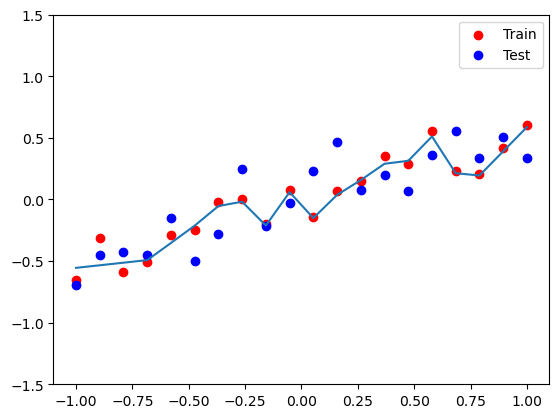

In [11]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout Model

In [12]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [13]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.012195511721074581, Test: 0.037601374089717865


In [14]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 112ms/step


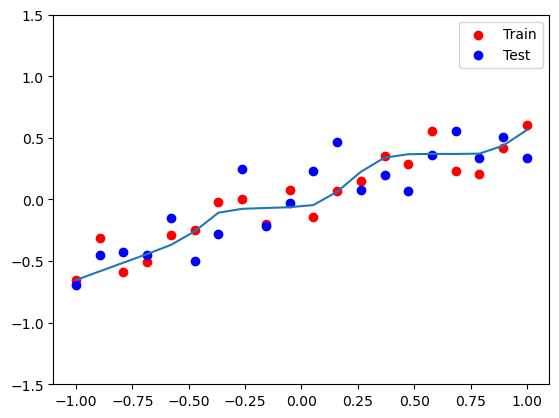

In [15]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

#  For Classification

In [17]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [18]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

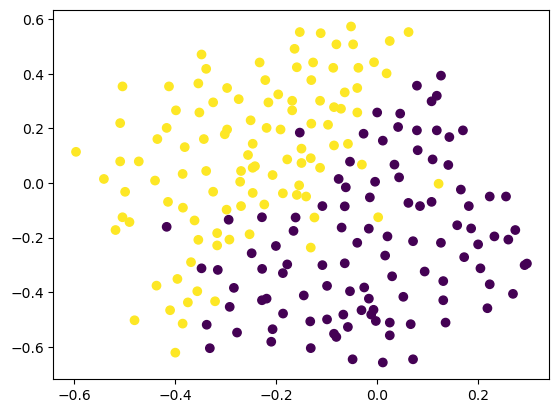

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [20]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 2s 69ms/step - loss: 0.5606 - accuracy: 0.7440 - val_loss: 0.6131 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2823 - accuracy: 0.8929 - val_loss: 0.6094 - val_accuracy: 0.6977
Epoch 3/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2952 - accuracy: 0.8810 - val_loss: 0.3851 - val_accuracy: 0.8372
Epoch 4/500
6/6 [==============================] - 0s 17ms/step - loss: 0.2630 - accuracy: 0.9107 - val_loss: 0.3285 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2399 - accuracy: 0.9048 - val_loss: 0.3835 - val_accuracy: 0.8372
Epoch 6/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2156 - accuracy: 0.9286 - val_loss: 0.4011 - val_accuracy: 0.8605
Epoch 7/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2177 - accuracy: 0.9286 - val_loss: 0.3401 - val_accuracy: 0.8837
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 17ms/step - loss: 0.1416 - accuracy: 0.9583 - val_loss: 0.4635 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1428 - accuracy: 0.9405 - val_loss: 0.4552 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1415 - accuracy: 0.9524 - val_loss: 0.4552 - val_accuracy: 0.8837
Epoch 62/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1525 - accuracy: 0.9286 - val_loss: 0.5657 - val_accuracy: 0.8372
Epoch 63/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1315 - accuracy: 0.9405 - val_loss: 0.4602 - val_accuracy: 0.8837
Epoch 64/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1296 - accuracy: 0.9464 - val_loss: 0.5178 - val_accuracy: 0.8372
Epoch 65/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1377 - accuracy: 0.9286 - val_loss: 0.5910 - val_accuracy: 0.8372
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 13ms/step - loss: 0.1038 - accuracy: 0.9464 - val_loss: 0.8184 - val_accuracy: 0.8140
Epoch 118/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1052 - accuracy: 0.9405 - val_loss: 0.8367 - val_accuracy: 0.8140
Epoch 119/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1139 - accuracy: 0.9524 - val_loss: 0.7028 - val_accuracy: 0.8372
Epoch 120/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1184 - accuracy: 0.9464 - val_loss: 0.9717 - val_accuracy: 0.8140
Epoch 121/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0941 - accuracy: 0.9643 - val_loss: 0.8723 - val_accuracy: 0.7907
Epoch 122/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0849 - accuracy: 0.9643 - val_loss: 0.7716 - val_accuracy: 0.8140
Epoch 123/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0959 - accuracy: 0.9405 - val_loss: 0.9546 - val_accuracy: 0.8140
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0787 - accuracy: 0.9583 - val_loss: 1.0216 - val_accuracy: 0.8140
Epoch 176/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0752 - accuracy: 0.9702 - val_loss: 1.2853 - val_accuracy: 0.7907
Epoch 177/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0779 - accuracy: 0.9643 - val_loss: 1.1483 - val_accuracy: 0.8140
Epoch 178/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0841 - accuracy: 0.9643 - val_loss: 0.9592 - val_accuracy: 0.8140
Epoch 179/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0695 - accuracy: 0.9702 - val_loss: 0.8694 - val_accuracy: 0.8372
Epoch 180/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0777 - accuracy: 0.9702 - val_loss: 0.9322 - val_accuracy: 0.8140
Epoch 181/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0738 - accuracy: 0.9643 - val_loss: 1.0962 - val_accuracy: 0.8140
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1074 - accuracy: 0.9643 - val_loss: 1.2015 - val_accuracy: 0.7907
Epoch 234/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0757 - accuracy: 0.9583 - val_loss: 1.0632 - val_accuracy: 0.8140
Epoch 235/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0783 - accuracy: 0.9702 - val_loss: 1.2565 - val_accuracy: 0.7907
Epoch 236/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0906 - accuracy: 0.9643 - val_loss: 1.2830 - val_accuracy: 0.7442
Epoch 237/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0748 - accuracy: 0.9643 - val_loss: 1.3701 - val_accuracy: 0.7442
Epoch 238/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0783 - accuracy: 0.9702 - val_loss: 0.9618 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0803 - accuracy: 0.9702 - val_loss: 0.8016 - val_accuracy: 0.8372
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0460 - accuracy: 0.9821 - val_loss: 0.9375 - val_accuracy: 0.8372
Epoch 292/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0457 - accuracy: 0.9762 - val_loss: 0.8733 - val_accuracy: 0.8140
Epoch 293/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0438 - accuracy: 0.9821 - val_loss: 1.0008 - val_accuracy: 0.8372
Epoch 294/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 1.0578 - val_accuracy: 0.8140
Epoch 295/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.9348 - val_accuracy: 0.8140
Epoch 296/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0432 - accuracy: 0.9762 - val_loss: 0.9835 - val_accuracy: 0.8140
Epoch 297/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 1.1708 - val_accuracy: 0.8140
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0286 - accuracy: 0.9940 - val_loss: 1.3051 - val_accuracy: 0.8140
Epoch 350/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0284 - accuracy: 0.9881 - val_loss: 1.3546 - val_accuracy: 0.8140
Epoch 351/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0303 - accuracy: 0.9881 - val_loss: 1.3982 - val_accuracy: 0.7907
Epoch 352/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0304 - accuracy: 0.9821 - val_loss: 1.2411 - val_accuracy: 0.7907
Epoch 353/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.9762 - val_loss: 1.3355 - val_accuracy: 0.7674
Epoch 354/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0297 - accuracy: 0.9881 - val_loss: 1.5428 - val_accuracy: 0.7907
Epoch 355/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0407 - accuracy: 0.9762 - val_loss: 1.5090 - val_accuracy: 0.7907
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0589 - accuracy: 0.9762 - val_loss: 1.8708 - val_accuracy: 0.7674
Epoch 408/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0533 - accuracy: 0.9762 - val_loss: 1.8044 - val_accuracy: 0.7674
Epoch 409/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0462 - accuracy: 0.9821 - val_loss: 1.7317 - val_accuracy: 0.7907
Epoch 410/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0470 - accuracy: 0.9881 - val_loss: 1.7806 - val_accuracy: 0.7907
Epoch 411/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0442 - accuracy: 0.9762 - val_loss: 1.9040 - val_accuracy: 0.7907
Epoch 412/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0412 - accuracy: 0.9881 - val_loss: 1.9742 - val_accuracy: 0.7674
Epoch 413/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0415 - accuracy: 0.9821 - val_loss: 1.9299 - val_accuracy: 0.7442
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0252 - accuracy: 0.9881 - val_loss: 2.0786 - val_accuracy: 0.7674
Epoch 466/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0287 - accuracy: 0.9881 - val_loss: 2.2192 - val_accuracy: 0.7442
Epoch 467/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0422 - accuracy: 0.9821 - val_loss: 1.6425 - val_accuracy: 0.7674
Epoch 468/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0519 - accuracy: 0.9702 - val_loss: 1.0745 - val_accuracy: 0.8140
Epoch 469/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0452 - accuracy: 0.9762 - val_loss: 1.5852 - val_accuracy: 0.7674
Epoch 470/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0782 - accuracy: 0.9762 - val_loss: 1.4162 - val_accuracy: 0.7674
Epoch 471/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0293 - accuracy: 0.9881 - val_loss: 1.3291 - val_accuracy: 0.8140
Epoch 

9600/9600 [==============================] - 21s 2ms/step


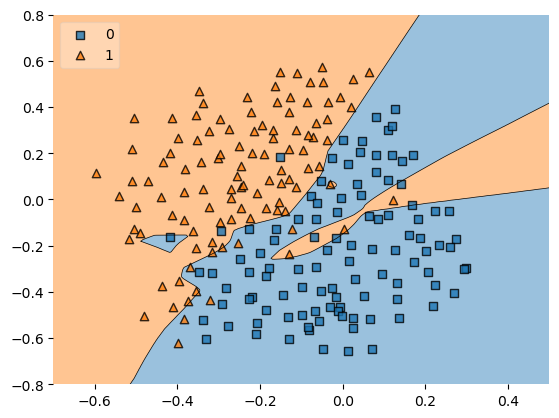

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

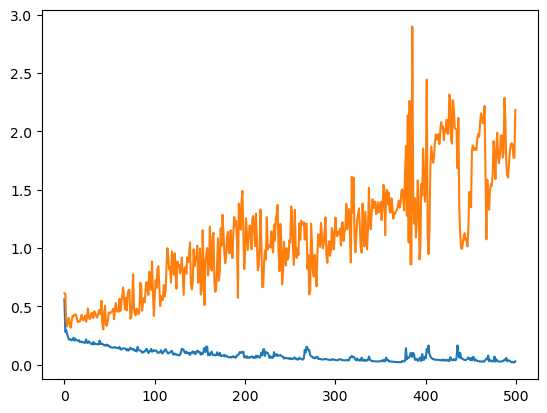

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

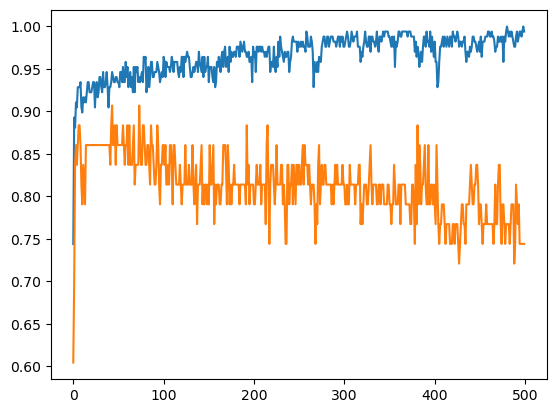

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [24]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 2s 67ms/step - loss: 0.5671 - accuracy: 0.8452 - val_loss: 0.5975 - val_accuracy: 0.6279
Epoch 2/500
6/6 [==============================] - 0s 19ms/step - loss: 0.3133 - accuracy: 0.8810 - val_loss: 0.7355 - val_accuracy: 0.6977
Epoch 3/500
6/6 [==============================] - 0s 26ms/step - loss: 0.3099 - accuracy: 0.8690 - val_loss: 0.4358 - val_accuracy: 0.8140
Epoch 4/500
6/6 [==============================] - 0s 16ms/step - loss: 0.2044 - accuracy: 0.9167 - val_loss: 0.4108 - val_accuracy: 0.7674
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2113 - accuracy: 0.9107 - val_loss: 0.3696 - val_accuracy: 0.8372
Epoch 6/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1915 - accuracy: 0.9286 - val_loss: 0.4154 - val_accuracy: 0.7907
Epoch 7/500
6/6 [==============================] - 0s 18ms/step - loss: 0.3186 - accuracy: 0.8988 - val_loss: 0.4491 - val_accuracy: 0.8140
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 17ms/step - loss: 0.1953 - accuracy: 0.9286 - val_loss: 0.4320 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2166 - accuracy: 0.9286 - val_loss: 0.4073 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1897 - accuracy: 0.9286 - val_loss: 0.4461 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 17ms/step - loss: 0.2098 - accuracy: 0.9405 - val_loss: 0.4065 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 17ms/step - loss: 0.2006 - accuracy: 0.9226 - val_loss: 0.3831 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1856 - accuracy: 0.9345 - val_loss: 0.4159 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2015 - accuracy: 0.9226 - val_loss: 0.3838 - val_accuracy: 0.8605
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 16ms/step - loss: 0.1886 - accuracy: 0.9286 - val_loss: 0.4754 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2159 - accuracy: 0.9167 - val_loss: 0.4556 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1868 - accuracy: 0.9345 - val_loss: 0.4835 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1906 - accuracy: 0.9405 - val_loss: 0.4619 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1853 - accuracy: 0.9286 - val_loss: 0.4293 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 25ms/step - loss: 0.1600 - accuracy: 0.9345 - val_loss: 0.4327 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1639 - accuracy: 0.9405 - val_loss: 0.4763 - val_accuracy: 0.8605
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1824 - accuracy: 0.9286 - val_loss: 0.5500 - val_accuracy: 0.8605
Epoch 176/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1968 - accuracy: 0.9286 - val_loss: 0.5461 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1944 - accuracy: 0.9405 - val_loss: 0.4766 - val_accuracy: 0.8837
Epoch 178/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1949 - accuracy: 0.9107 - val_loss: 0.5289 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1763 - accuracy: 0.9345 - val_loss: 0.6454 - val_accuracy: 0.8372
Epoch 180/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1941 - accuracy: 0.9048 - val_loss: 0.6380 - val_accuracy: 0.8372
Epoch 181/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1460 - accuracy: 0.9405 - val_loss: 0.5628 - val_accuracy: 0.8605
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2098 - accuracy: 0.9167 - val_loss: 0.5353 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1747 - accuracy: 0.9524 - val_loss: 0.5570 - val_accuracy: 0.8605
Epoch 235/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1734 - accuracy: 0.9345 - val_loss: 0.5060 - val_accuracy: 0.8837
Epoch 236/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1672 - accuracy: 0.9345 - val_loss: 0.4104 - val_accuracy: 0.9070
Epoch 237/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1823 - accuracy: 0.9345 - val_loss: 0.4069 - val_accuracy: 0.8837
Epoch 238/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1597 - accuracy: 0.9405 - val_loss: 0.4344 - val_accuracy: 0.8837
Epoch 239/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1498 - accuracy: 0.9464 - val_loss: 0.5108 - val_accuracy: 0.8837
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1459 - accuracy: 0.9405 - val_loss: 0.7680 - val_accuracy: 0.8372
Epoch 292/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1213 - accuracy: 0.9405 - val_loss: 0.7709 - val_accuracy: 0.8372
Epoch 293/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1309 - accuracy: 0.9405 - val_loss: 0.7501 - val_accuracy: 0.8372
Epoch 294/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1270 - accuracy: 0.9345 - val_loss: 0.8314 - val_accuracy: 0.8372
Epoch 295/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1253 - accuracy: 0.9345 - val_loss: 0.9741 - val_accuracy: 0.8605
Epoch 296/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1375 - accuracy: 0.9286 - val_loss: 0.9079 - val_accuracy: 0.8605
Epoch 297/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1830 - accuracy: 0.9048 - val_loss: 0.8713 - val_accuracy: 0.8372
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1698 - accuracy: 0.9524 - val_loss: 0.6964 - val_accuracy: 0.8605
Epoch 350/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1317 - accuracy: 0.9524 - val_loss: 0.7299 - val_accuracy: 0.8605
Epoch 351/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1677 - accuracy: 0.9286 - val_loss: 0.7277 - val_accuracy: 0.8605
Epoch 352/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1429 - accuracy: 0.9405 - val_loss: 0.7320 - val_accuracy: 0.8605
Epoch 353/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1254 - accuracy: 0.9464 - val_loss: 0.7470 - val_accuracy: 0.8605
Epoch 354/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1435 - accuracy: 0.9405 - val_loss: 0.8409 - val_accuracy: 0.8605
Epoch 355/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1659 - accuracy: 0.9405 - val_loss: 0.8081 - val_accuracy: 0.8605
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1202 - accuracy: 0.9464 - val_loss: 1.0225 - val_accuracy: 0.8605
Epoch 408/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1381 - accuracy: 0.9286 - val_loss: 1.0238 - val_accuracy: 0.8605
Epoch 409/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1529 - accuracy: 0.9286 - val_loss: 0.8766 - val_accuracy: 0.8605
Epoch 410/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1508 - accuracy: 0.9464 - val_loss: 0.5500 - val_accuracy: 0.9070
Epoch 411/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1575 - accuracy: 0.9464 - val_loss: 0.5719 - val_accuracy: 0.9070
Epoch 412/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1592 - accuracy: 0.9405 - val_loss: 0.6838 - val_accuracy: 0.8605
Epoch 413/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1442 - accuracy: 0.9464 - val_loss: 0.9232 - val_accuracy: 0.8605
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1566 - accuracy: 0.9405 - val_loss: 0.7652 - val_accuracy: 0.8605
Epoch 466/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1756 - accuracy: 0.9167 - val_loss: 0.8869 - val_accuracy: 0.8605
Epoch 467/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1922 - accuracy: 0.9345 - val_loss: 0.9988 - val_accuracy: 0.8605
Epoch 468/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1434 - accuracy: 0.9464 - val_loss: 0.9667 - val_accuracy: 0.8605
Epoch 469/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1680 - accuracy: 0.9286 - val_loss: 0.8489 - val_accuracy: 0.8605
Epoch 470/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1461 - accuracy: 0.9405 - val_loss: 0.7772 - val_accuracy: 0.8837
Epoch 471/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1549 - accuracy: 0.9286 - val_loss: 0.8963 - val_accuracy: 0.8605
Epoch 

9600/9600 [==============================] - 24s 2ms/step


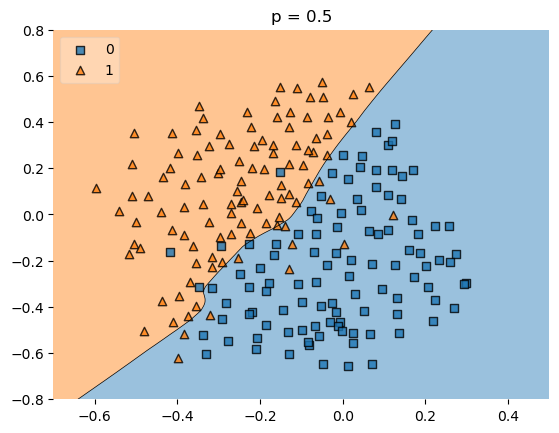

In [25]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

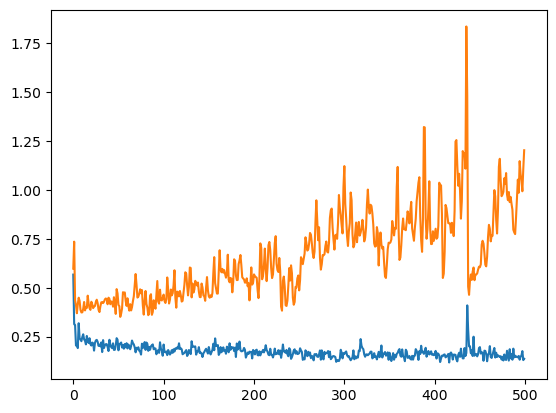

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

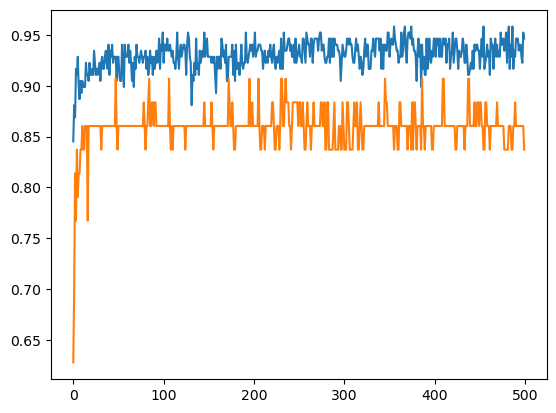

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])